In [1]:
import numpy as np, pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import keras as K
from keras.models import Sequential
from keras.layers import Dropout, Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow


#read the data from the espicied file "data.xlsx"
file_name='data.xlsx'
data_excel = pd.DataFrame(pd.read_excel(file_name))
[n_rows,n_columns] =data_excel.shape
print(n_rows, n_columns)
columns = data_excel.columns


Using TensorFlow backend.


134 21


In [2]:
#clean data
# all X15 are 'Blanco' so they do not give any information to our model
data_excel= data_excel.drop(columns="X15")
#is possible to see that the X16 input is a datetime
data_excel['X16']= data_excel['X16'].apply(pd.to_datetime) #convert the date
data_excel['X16'] = data_excel['X16'] - data_excel['X16'].min() #
#update columns names
columns = data_excel.columns

In [3]:
# ETL data is escaled
for column in columns:
    if data_excel[column].dtypes == 'float64':
        data_excel[column] = (data_excel[column]-data_excel[column].min())/data_excel[column].max()
    else:
        data_excel[column] = data_excel[column].infer_objects()
        data_excel[column] = (data_excel[column]-data_excel[column].min())/data_excel[column].max()
data_excel=shuffle(data_excel)

In [4]:
n_inputs=14
X=data_excel.iloc[:,0:n_inputs].as_matrix()
#Our goal is to find the Y_SUM output
Y=data_excel.iloc[:,19].as_matrix()

/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/drk/miniconda3/envs/proyecto/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [5]:
#define the NN model<<
model = Sequential()
model.add(Dense(100, input_shape=(n_inputs,)))
model.add(K.layers.LeakyReLU(alpha=0.03))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(K.layers.LeakyReLU(alpha=0.03))
model.add(Dense(1))

my_optimizer= K.optimizers.Adam(lr=0.0001)
model.compile(optimizer=my_optimizer, loss='logcosh', metrics=['logcosh'])
model.summary()
#load the previously saved weights for the oven
model.load_weights('weights_oven.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               1500      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 11,701
Trainable params: 11,701
Non-trainable params: 0
_________________________________________________________________


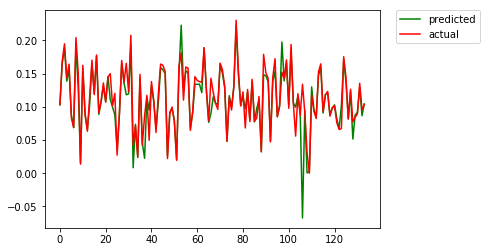

In [6]:
#print(xToPredict)
predicted=[]
actual=[]

## predict values from complete file
for number in range(0,n_rows,1):
    xToPredict= X[number].reshape((1,n_inputs))
    predicted.append(model.predict(xToPredict)[0][0])
    actual.append(Y[number])
    
actual=pd.DataFrame(actual)
predicted = pd.DataFrame(predicted)
data=pd.concat([actual,predicted],axis=1)
data.to_csv(file_name+'_predictions_prod.csv')
plt.plot(predicted,'g',label="predicted")
plt.plot(actual,'r',label="actual")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)